In [1]:

import numpy as np
import pandas as pd



In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train_copy = train.copy()
train_copy=train_copy.groupby('Emp_ID')

In [4]:
train1 = train.copy()
train1['Desg_diff'] = train1['Designation'] - train1['Joining Designation']
train1['Is_promoted'] = ['No' if (x==0) else 'Yes' for x in train1['Desg_diff']]
train1.drop('Desg_diff',axis=1,inplace=True)

In [5]:
train1['Attrition'] = [0 if (x is np.NaN) else 1 for x in train1['LastWorkingDate']]



In [6]:
train1

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Is_promoted,Attrition
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,No,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,No,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,No,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,No,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3,No,0
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3,No,0
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2,No,0
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2,No,0


In [7]:
from datetime import date
 
def numOfDays(date1, date2):
    return (date2-date1).days
     
train1['NumberOfDays']=''


In [9]:
from datetime import date


for i in range(0,len(train.index)):
    if(train1.loc[i]['LastWorkingDate'] is np.NaN):
        date1 = date(int(train1['Dateofjoining'][i].split('-')[0]),int(train1['Dateofjoining'][i].split('-')[1]),int(train1['Dateofjoining'][i].split('-')[2]))
        date2 = date(int(train1['MMM-YY'][i].split('-')[0]),int(train1['MMM-YY'][i].split('-')[1]),int(train1['MMM-YY'][i].split('-')[2]))
        train1['NumberOfDays'][i]=numOfDays(date1, date2)
    else:
        date1 = date(int(train1['Dateofjoining'][i].split('-')[0]),int(train1['Dateofjoining'][i].split('-')[1]),int(train1['Dateofjoining'][i].split('-')[2]))
        date2 = date(int(train1['LastWorkingDate'][i].split('-')[0]),int(train1['LastWorkingDate'][i].split('-')[1]),int(train1['LastWorkingDate'][i].split('-')[2]))
        train1['NumberOfDays'][i]=numOfDays(date1, date2)
       

<ipython-input-9-1da4b89ac148>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['NumberOfDays'][i]=numOfDays(date1, date2)
<ipython-input-9-1da4b89ac148>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['NumberOfDays'][i]=numOfDays(date1, date2)


In [10]:
train1['NumberOfDays']=train1['NumberOfDays'].astype('int32')

In [12]:

train1.loc[train1['NumberOfDays']<0 , 'NumberOfDays'] = 0

In [13]:
train1

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Is_promoted,Attrition,NumberOfDays
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,No,0,8
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,No,0,39
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,No,1,78
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,No,0,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,No,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3,No,0,54
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3,No,0,85
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2,No,0,115
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2,No,0,146


In [14]:

train1.Attrition.mean()

0.08458961474036851

In [24]:
train1.NumberOfDays.max()

2801

<AxesSubplot:xlabel='NumberOfDays', ylabel='Count'>

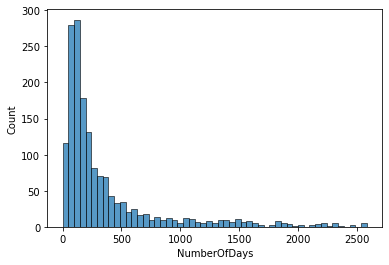

In [19]:
import seaborn as sns
sns.histplot(train1.loc[train1.Attrition==1]['NumberOfDays'])

<AxesSubplot:xlabel='NumberOfDays', ylabel='Count'>

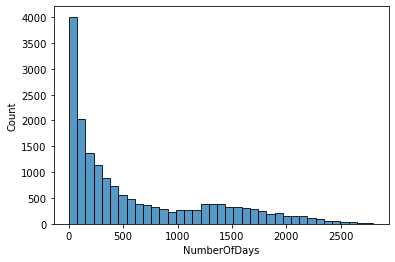

In [21]:
import seaborn as sns
sns.histplot(train1.loc[train1.Attrition==0]['NumberOfDays'])

In [20]:
train1.loc[train1.Attrition==1]['NumberOfDays']

<bound method NDFrame._add_numeric_operations.<locals>.max of 2         78
9        141
12        58
20        57
27       175
        ... 
19039     19
19054     92
19081     61
19090    419
19096    335
Name: NumberOfDays, Length: 1616, dtype: int32>